<a href="https://colab.research.google.com/github/silvererudite/ML_algos_onSomeDatasets/blob/master/final_model_tweak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
from sklearn.datasets import make_multilabel_classification
import pickle

In [346]:
data=pd.read_csv("features_all.csv")

In [347]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
0,56.499274,64.436050,0.876827,11437.251030,1.140476,4.765292,293.950998,0.727273,0.719298,0.951220,0.615385,48.792271,48.772649,48.821751,54.385965,0.560036,0.439964,42.286397,37.480158,0.433864,0.566136,42.442975,48.482970,0.488712,0.511288,42.364758,43.332209,0.464253,2.014903,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,23497.20658,402,4061,3461,1.111771e+07,28.088789,18.615108,5.345337,0.771306,4.610239,8.031870,37.130636,2.265080e+05,34353.06152,303,4103,1369,1.634150e+07,35.582928,28.291786,22.178263,3.511124,5.208256,5.404118,45.016397,2.869407e+05,1,1,1,1
1,38.494614,60.133732,0.640150,7272.236655,1.562134,4.568638,375.747709,0.704918,0.728814,1.000000,0.187500,49.565217,49.539509,49.588632,47.457627,0.439442,0.560558,25.518897,28.821846,0.593959,0.406041,46.344314,38.318015,0.549043,0.450957,37.409956,33.904049,0.437149,1.519826,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,19498.33897,65,4069,2147,1.273443e+07,35.652259,26.890440,18.460009,0.626466,3.901974,10.081427,39.738780,2.874998e+05,33070.59514,57,4062,77,3.146819e+08,183.147256,148.451553,100.986362,2.976626,6.191706,4.129102,197.542525,1.476899e+06,1,1,1,1
2,34.326195,97.560340,0.351846,10520.802030,2.842154,4.729019,1109.126111,0.691176,0.672414,1.000000,0.210526,48.942598,48.975740,48.914179,50.000000,0.429188,0.570812,22.491153,25.937885,0.519018,0.480982,70.285331,67.660861,0.509120,0.490880,52.181796,51.238491,0.334139,0.980829,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,20702.74300,168,4044,2238,1.527826e+07,35.346504,24.917630,19.742515,0.574915,4.545179,8.561064,43.527299,2.850342e+05,32713.50205,75,4063,276,1.333090e+08,114.491973,93.392981,79.627275,3.607022,4.860031,5.657168,128.574371,9.232633e+05,1,1,1,1
3,54.386290,51.999555,1.045899,8884.621601,0.956115,4.655609,198.870247,0.750000,0.767857,0.976744,0.416667,48.785425,48.838576,48.731062,55.357143,0.510135,0.489865,38.853157,38.073415,0.304591,0.695409,28.698425,43.363050,0.411994,0.588006,34.155288,40.804038,0.276105,1.558145,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,22017.14682,128,3980,2728,1.292103e+09,265.383533,175.288366,-2.561121,1.790132,2.076415,22.743032,400.288654,2.140053e+06,35221.46617,341,4000,2810,4.560663e+07,54.005690,43.538431,32.518690,3.199306,5.735353,4.390926,75.203621,4.355019e+05,0,1,1,1
4,67.950109,73.492253,0.924589,15688.506310,1.081562,4.902552,317.945701,0.687500,0.700000,0.976190,0.222222,50.961538,50.880256,51.044690,43.333333,0.488062,0.511938,47.474949,48.622298,0.500697,0.499303,52.003096,51.930620,0.494874,0.505126,49.790525,50.303664,0.344003,1.791759,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,24034.26809,243,4020,1965,9.636950e+06,28.738650,21.308054,13.828354,1.511439,2.835474,16.161550,34.569616,2.317485e+05,36339.21410,161,4082,240,6.029838e+08,223.518368,168.482448,70.074116,3.442979,5.179062,5.221266,273.449761,1.802452e+06,1,0,1,1


In [348]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
count,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.00000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1.280000e+03,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000
mean,161.013298,171.390118,0.862372,4.871379e+05,1.463456,5.218642,826.784017,0.624016,0.628330,0.869964,0.212702,50.679901,50.626913,50.709289,48.947109,0.506398,0.493602,116.037504,108.698617,0.519307,0.480693,123.228363,116.105317,0.511142,0.488858,121.046076,114.087299,0.530187,inf,777.044633,585.113709,134.569607,2279.744611,44.313390,317.12221,-0.741020,1993.170153,996.585076,577.703507,13.456961,45.054410,41770.126481,246.180469,3973.425000,2453.238281,4.945978e+08,114.056891,86.523804,45.301009,7.983670,9.999159,37.734343,136.448393,9.197548e+05,5.426604e+04,148.430469,4048.007812,2285.481250,3.548739e+09,236.918051,179.356454,95.728270,56.941626,5.384987,27.675723,283.943291,1.910507e+06,0.553125,0.575781,0.609375,0.664844
std,357.160715,359.083954,0.350817,6.805632e+06,0.840066,0.791423,1463.202022,0.082112,0.094507,0.106237,0.120148,3.456464,3.066653,3.899599,4.635587,0.098768,0.098768,282.659523,222.089590,0.108581,0.108581,277.920938,228.933814,0.069150,0.069150,279.715542,224.719728,0.144208,NaN,1357.950468,1095.865682,216.721826,6133.417145,99.891565,551.72826,45.041114,5984.011960,2992.005980,1064.987450,21.672183,102.482016,44191.816468,290.465727,159.804711,1870.950353,4.876149e+09,163.850525,126.749188,69.377179,89.067248,8.154483,364.314244,206.697418,1.321291e+06,1.112083e+05,192.965499,134.321717,1622.868152,7.809983e+10,398.556439,266.275909,157.492325,1348.442359,4.724186,252.772599,600.086170,3.213959e+06,0.497364,0.494417,0.488081,0.472230
min,9.700788,10.713260,0.178237,4.802812e+02,0.517134,3.388466,30.363813,0.302632,0.250000,0.235294,0.000000,20.155039,26.759609,13.676694,34.666667,0.006234,0.000012,6.932906,6.793956,0.015969,0.018276,5.903931,8.325049,0.011176,0.009384,6.596651,9.027487,0.003445,0.059571,2.000000,1.000000,0.000000,2.037350,-98.000000,0.00000,-423.600000,0.062500,0.031250,0.000000,0.000000,0.100000,13568.818680,1.000000,3424.000000,59.000000,8.079002e+05,8.208445,6.030365,-8.504984,0.135456,0.527943,0.125085,10.009298,6.619290e+04,1.953171e+04,1.000000,3448.000000,47.000000,4.935236e+06,18.307567,12.896702,-3001.760388,0.715906,0.529158,0.229237,24.738804,1.476322e+05,0.000000,0.000000,0.000000,0.000000
25%,35.056095,64.931407,0.551804,7.146250e+03,0.917191,4.561048,346.758189,0.578125,0.577465,0.833333,0.125000,49.424735,49.418959,49.316785,45.896818,0.458704,0.459616,24.664244,21.181825,0.451552,0.417979,46.062703,42.884734,0.483512,0.467983,38.519713,37.549770,0.446513,1.169802,64.000000,26.000000,0.000000,39.888761,0.500000,6.00000,0.000000,15.031222,7.515611,49.000000,0.000000,0.300000,21892.178300,72.000000,3898.000000,470.500000,1.978414e+07,39.794159,30.432750,15.099019,0.515281,4.145443,2.146908,49.531687,3.209001e+05,3.158962e+04,43.750000,3994.000000,627.500000,7.736988e+07,79.867882,60.002827,30.323755,2.356691,2.892265,4.140427,97.951318,6.440546e+05,0.0000

In [349]:
indexNames = data[ data['28'] == 'inf' ].index
data.drop(indexNames , inplace=True)
data.replace('', np.NaN, inplace=True) 
data.fillna(data.mean(), inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
0,56.499274,64.436050,0.876827,11437.251030,1.140476,4.765292,293.950998,0.727273,0.719298,0.951220,0.615385,48.792271,48.772649,48.821751,54.385965,0.560036,0.439964,42.286397,37.480158,0.433864,0.566136,42.442975,48.482970,0.488712,0.511288,42.364758,43.332209,0.464253,2.014903,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,23497.20658,402,4061,3461,1.111771e+07,28.088789,18.615108,5.345337,0.771306,4.610239,8.031870,37.130636,2.265080e+05,34353.06152,303,4103,1369,1.634150e+07,35.582928,28.291786,22.178263,3.511124,5.208256,5.404118,45.016397,2.869407e+05,1,1,1,1
1,38.494614,60.133732,0.640150,7272.236655,1.562134,4.568638,375.747709,0.704918,0.728814,1.000000,0.187500,49.565217,49.539509,49.588632,47.457627,0.439442,0.560558,25.518897,28.821846,0.593959,0.406041,46.344314,38.318015,0.549043,0.450957,37.409956,33.904049,0.437149,1.519826,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,19498.33897,65,4069,2147,1.273443e+07,35.652259,26.890440,18.460009,0.626466,3.901974,10.081427,39.738780,2.874998e+05,33070.59514,57,4062,77,3.146819e+08,183.147256,148.451553,100.986362,2.976626,6.191706,4.129102,197.542525,1.476899e+06,1,1,1,1
2,34.326195,97.560340,0.351846,10520.802030,2.842154,4.729019,1109.126111,0.691176,0.672414,1.000000,0.210526,48.942598,48.975740,48.914179,50.000000,0.429188,0.570812,22.491153,25.937885,0.519018,0.480982,70.285331,67.660861,0.509120,0.490880,52.181796,51.238491,0.334139,0.980829,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,20702.74300,168,4044,2238,1.527826e+07,35.346504,24.917630,19.742515,0.574915,4.545179,8.561064,43.527299,2.850342e+05,32713.50205,75,4063,276,1.333090e+08,114.491973,93.392981,79.627275,3.607022,4.860031,5.657168,128.574371,9.232633e+05,1,1,1,1
3,54.386290,51.999555,1.045899,8884.621601,0.956115,4.655609,198.870247,0.750000,0.767857,0.976744,0.416667,48.785425,48.838576,48.731062,55.357143,0.510135,0.489865,38.853157,38.073415,0.304591,0.695409,28.698425,43.363050,0.411994,0.588006,34.155288,40.804038,0.276105,1.558145,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,22017.14682,128,3980,2728,1.292103e+09,265.383533,175.288366,-2.561121,1.790132,2.076415,22.743032,400.288654,2.140053e+06,35221.46617,341,4000,2810,4.560663e+07,54.005690,43.538431,32.518690,3.199306,5.735353,4.390926,75.203621,4.355019e+05,0,1,1,1
4,67.950109,73.492253,0.924589,15688.506310,1.081562,4.902552,317.945701,0.687500,0.700000,0.976190,0.222222,50.961538,50.880256,51.044690,43.333333,0.488062,0.511938,47.474949,48.622298,0.500697,0.499303,52.003096,51.930620,0.494874,0.505126,49.790525,50.303664,0.344003,1.791759,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,24034.26809,243,4020,1965,9.636950e+06,28.738650,21.308054,13.828354,1.511439,2.835474,16.161550,34.569616,2.317485e+05,36339.21410,161,4082,240,6.029838e+08,223.518368,168.482448,70.074116,3.442979,5.179062,5.221266,273.449761,1.802452e+06,1,0,1,1


In [350]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
0,56.499274,64.436050,0.876827,11437.251030,1.140476,4.765292,293.950998,0.727273,0.719298,0.951220,0.615385,48.792271,48.772649,48.821751,54.385965,0.560036,0.439964,42.286397,37.480158,0.433864,0.566136,42.442975,48.482970,0.488712,0.511288,42.364758,43.332209,0.464253,2.014903,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,23497.20658,402,4061,3461,1.111771e+07,28.088789,18.615108,5.345337,0.771306,4.610239,8.031870,37.130636,2.265080e+05,34353.06152,303,4103,1369,1.634150e+07,35.582928,28.291786,22.178263,3.511124,5.208256,5.404118,45.016397,2.869407e+05,1,1,1,1
1,38.494614,60.133732,0.640150,7272.236655,1.562134,4.568638,375.747709,0.704918,0.728814,1.000000,0.187500,49.565217,49.539509,49.588632,47.457627,0.439442,0.560558,25.518897,28.821846,0.593959,0.406041,46.344314,38.318015,0.549043,0.450957,37.409956,33.904049,0.437149,1.519826,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,19498.33897,65,4069,2147,1.273443e+07,35.652259,26.890440,18.460009,0.626466,3.901974,10.081427,39.738780,2.874998e+05,33070.59514,57,4062,77,3.146819e+08,183.147256,148.451553,100.986362,2.976626,6.191706,4.129102,197.542525,1.476899e+06,1,1,1,1
2,34.326195,97.560340,0.351846,10520.802030,2.842154,4.729019,1109.126111,0.691176,0.672414,1.000000,0.210526,48.942598,48.975740,48.914179,50.000000,0.429188,0.570812,22.491153,25.937885,0.519018,0.480982,70.285331,67.660861,0.509120,0.490880,52.181796,51.238491,0.334139,0.980829,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,20702.74300,168,4044,2238,1.527826e+07,35.346504,24.917630,19.742515,0.574915,4.545179,8.561064,43.527299,2.850342e+05,32713.50205,75,4063,276,1.333090e+08,114.491973,93.392981,79.627275,3.607022,4.860031,5.657168,128.574371,9.232633e+05,1,1,1,1
3,54.386290,51.999555,1.045899,8884.621601,0.956115,4.655609,198.870247,0.750000,0.767857,0.976744,0.416667,48.785425,48.838576,48.731062,55.357143,0.510135,0.489865,38.853157,38.073415,0.304591,0.695409,28.698425,43.363050,0.411994,0.588006,34.155288,40.804038,0.276105,1.558145,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,22017.14682,128,3980,2728,1.292103e+09,265.383533,175.288366,-2.561121,1.790132,2.076415,22.743032,400.288654,2.140053e+06,35221.46617,341,4000,2810,4.560663e+07,54.005690,43.538431,32.518690,3.199306,5.735353,4.390926,75.203621,4.355019e+05,0,1,1,1
4,67.950109,73.492253,0.924589,15688.506310,1.081562,4.902552,317.945701,0.687500,0.700000,0.976190,0.222222,50.961538,50.880256,51.044690,43.333333,0.488062,0.511938,47.474949,48.622298,0.500697,0.499303,52.003096,51.930620,0.494874,0.505126,49.790525,50.303664,0.344003,1.791759,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,24034.26809,243,4020,1965,9.636950e+06,28.738650,21.308054,13.828354,1.511439,2.835474,16.161550,34.569616,2.317485e+05,36339.21410,161,4082,240,6.029838e+08,223.518368,168.482448,70.074116,3.442979,5.179062,5.221266,273.449761,1.802452e+06,1,0,1,1


In [351]:
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
25.1         0
Valence      0
Arousal      0
Dominance    0
Likings      0
Length: 71, dtype: int64

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1279
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          1280 non-null   float64
 1   1          1280 non-null   float64
 2   2          1280 non-null   float64
 3   3          1280 non-null   float64
 4   4          1280 non-null   float64
 5   5          1280 non-null   float64
 6   6          1280 non-null   float64
 7   7          1280 non-null   float64
 8   8          1280 non-null   float64
 9   9          1280 non-null   float64
 10  10         1280 non-null   float64
 11  11         1280 non-null   float64
 12  12         1280 non-null   float64
 13  13         1280 non-null   float64
 14  14         1280 non-null   float64
 15  15         1280 non-null   float64
 16  16         1280 non-null   float64
 17  17         1280 non-null   float64
 18  18         1280 non-null   float64
 19  19         1280 non-null   float64
 20  20      

In [353]:
data =data[~data.isin([np.inf, -np.inf]).any(1)]

In [354]:
df = data.drop(['Valence','Dominance','Likings'],axis=1).values
df = pd.DataFrame(df)
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
pearsoncorr = df.corr(method='pearson')
pearsoncorr



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1.000000,0.994672,0.183309,0.923749,-0.211647,0.560263,0.957137,0.157413,0.207698,0.114516,0.210570,0.175062,-0.047361,0.199326,0.092971,0.077140,-0.077140,0.987101,0.892627,0.026156,-0.026156,0.975618,0.921998,0.081609,-0.081609,0.982604,0.916389,-0.190271,-0.038835,-0.047140,-0.042445,-0.031085,-0.021627,-0.034353,-0.040689,0.011276,-0.019963,-0.019963,-0.038528,-0.031085,-0.038808,-0.000973,0.036945,-0.031676,-0.048694,0.003927,-0.001844,-0.000535,0.002938,0.000838,0.077937,-0.000298,-0.002549,-0.001844,0.015643,-0.030644,0.070521,0.008002,0.009742,0.047802,0.052320,0.034838,0.011009,-0.012585,0.022834,0.041039,0.047802,0.004795
1,0.994672,1.000000,0.100535,0.922700,-0.143724,0.536386,0.979832,0.104859,0.154143,0.068759,0.177093,0.196949,-0.027483,0.219043,0.094713,0.093934,-0.093934,0.987136,0.873426,0.023474,-0.023474,0.984952,0.916834,0.088673,-0.088673,0.987529,0.904969,-0.202197,-0.038124,-0.048761,-0.044790,-0.031485,-0.028423,-0.039069,-0.042992,0.006213,-0.025633,-0.025633,-0.043028,-0.031485,-0.041234,-0.009049,0.028506,-0.017397,-0.054188,-0.002696,-0.009659,-0.008356,-0.004541,-0.005587,0.067462,-0.007895,-0.010043,-0.009659,0.014332,-0.036949,0.062897,0.014299,0.005670,0.050355,0.055837,0.042703,0.006627,-0.026026,0.019787,0.041376,0.050355,0.000305
2,0.183309,0.100535,1.000000,0.025142,-0.889548,0.532733,-0.058218,0.578914,0.629768,0.548549,0.364784,-0.126380,-0.156668,-0.103595,0.049729,-0.133049,0.133049,0.164057,0.205347,0.039623,-0.039623,0.094165,0.104996,-0.064559,0.064559,0.126692,0.151606,0.150327,-0.090926,-0.027737,-0.020535,-0.013567,0.046542,0.008688,-0.018952,0.063044,0.034569,0.034569,0.005372,-0.013567,-0.019091,0.115517,0.125298,-0.181050,0.048654,0.061410,0.080821,0.082546,0.086889,0.060796,0.130116,0.073581,0.076334,0.080821,0.026409,0.073203,0.145015,-0.081490,0.023842,-0.039158,-0.050204,-0.083051,0.028472,0.168928,0.003689,-0.019399,-0.039158,0.056547
3,0.923749,0.922700,0.025142,1.000000,-0.037494,0.268592,0.905885,0.042209,0.066134,0.016827,0.108314,0.162226,-0.032056,0.173446,0.042367,0.072183,-0.072183,0.899598,0.860439,0.040801,-0.040801,0.891647,0.888760,0.085873,-0.085873,0.897360,0.882813,-0.164133,-0.127258,-0.031211,-0.029493,-0.015661,-0.023075,-0.027044,-0.027487,0.003612,-0.020654,-0.020654,-0.028533,-0.015661,-0.028240,-0.003591,0.011376,0.021763,-0.033413,-0.004772,-0.017083,-0.016702,-0.016560,-0.005008,0.070989,-0.005943,-0.016123,-0.017083,-0.007897,-0.035891,0.064562,0.019309,0.000087,0.032310,0.038593,0.042370,-0.000322,-0.047406,0.007938,0.025068,0.032310,-0.006904
4,-0.211647,-0.143724,-0.889548,-0.037494,1.000000,-0.593372,0.030896,-0.569003,-0.636522,-0.565854,-0.348226,0.112751,0.147901,0.088506,-0.048867,0.134420,-0.134420,-0.191579,-0.231622,-0.034601,0.034601,-0.134882,-0.149110,0.036582,-0.036582,-0.159565,-0.185203,-0.113302,-0.019277,0.014329,0.007509,0.031355,-0.052951,-0.014627,0.017984,-0.035868,-0.042480,-0.042480,-0.007308,0.031355,0.001316,-0.077650,-0.113626,0.128525,-0.043296,-0.044859,-0.058014,-0.059705,-0.064803,-0.050008,-0.081005,-0.060142,-0.055259,-0.058014,-0.038246,-0.073994,-0.157759,0.083380,-0.016141,0.058555,0.071200,0.097651,-0.022771,-0.162470,0.014016,0.034544,0.058555,-0.059380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-0.012585,-0.026026,0.168928,-0.047406,-0.162470,0.132822,-0.053250,0.065501,0.086144,0.080391,0.005484,-0.028446,-0.010705,-0.033913,-0.008623,-0.012896,0.012896,-0.018442,0.005464,0.005182,-0.005182,-0.029217,-0.013899,-0.002894,0.002894,-0.024647,-0.005920,0.070481,0.054095,-0.027243,-0.02535

In [355]:
def knn_classifier():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Feature Scaling
    # from sklearn.preprocessing import StandardScaler
    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.transform(X_test)
    	
    # KNN
    clf1 = KNeighborsClassifier(n_neighbors=7, leaf_size=3, p=1)
    clf1.fit(X_train, y_train)
    y_predict = clf1.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf1, X_test, y_test) 
    print("Classification report of valence")
    print(classification_report(y_test, y_predict))
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    
    
    ###############################################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    # Feature Scaling
    # from sklearn.preprocessing import StandardScaler
    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.transform(X_test)
    	
    # KNN
    clf2 = KNeighborsClassifier(n_neighbors=7)
    clf2.fit(X_train, y_train)
    y_predict = clf2.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf2, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)

    test = data.sample(1)
    copy = test
    predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

    predict_y_arousal = test['Arousal'].values
    predict_y_valence = test['Valence'].values
    print(test)
    # print(copy)
    #print(predict_x)
    print(predict_y_arousal)
    print(predict_y_valence)
    Arousalpredict = clf2.predict(predict_x)
    Valencepredict = clf1.predict(predict_x)
    print(Arousalpredict)
    print(Valencepredict)

Classification report of valence
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       102
           1       0.61      0.59      0.60       148

    accuracy                           0.54       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.54      0.54      0.54       250

Accuracy score of Valence 
53.6
Accuracy score of Arousal 
49.6
             0         1        2  ...  Arousal  Dominance  Likings
260  15.567171  59.74967  0.26054  ...        1          1        1

[1 rows x 71 columns]
[1]
[0]
[0]
[0]


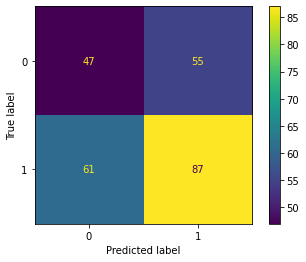

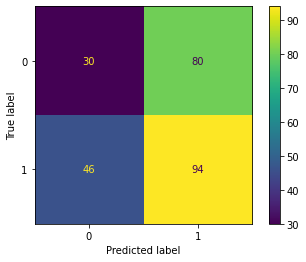

In [356]:
knn_classifier()

Accuracy score of valence test KNN-PCA
52.400000000000006
Accuracy score of Arousal test KNN-PCA
56.8


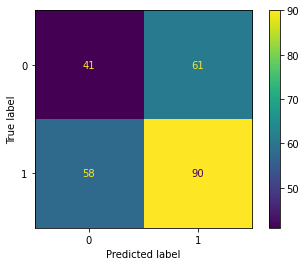

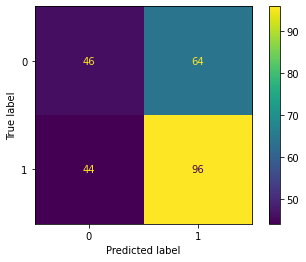

In [357]:
def knn_classifier_pca():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    # Feature Scaling
    # from sklearn.preprocessing import StandardScaler
    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.transform(X_test)
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=7, leaf_size=3, p=1)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of valence test KNN-PCA")
    
    print(accuracy_score(y_test, y_predict)*100)
    # print("AUC score for Valence")
    # print(roc_auc_score(y_test, y_predict))
    
    
    ########################################################################
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
        
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
        	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Arousal test KNN-PCA")
    print(accuracy_score(y_test, y_predict)*100)

knn_classifier_pca()   
    

In [358]:
def svm_classifier(): 
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf1 = SVC(kernel = 'rbf', random_state = 42)
    clf1.fit(X_train, y_train)
    y_predict = clf1.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf1, X_test, y_test) 
    
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf2 = SVC(kernel = 'rbf', random_state = 42)
    clf2.fit(X_train, y_train)
    y_predict = clf2.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf2, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)
    test = data.sample(1)
    copy = test
    predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

    predict_y_arousal = test['Arousal'].values
    predict_y_valence = test['Valence'].values
    print(test)
    # print(copy)
    print(predict_x)
    print(predict_y_arousal)
    print(predict_y_valence)
    Arousalpredict = clf2.predict(predict_x)
    Valencepredict = clf1.predict(predict_x)
    print(Arousalpredict)
    print(Valencepredict)

Accuracy score of Valence 
56.39999999999999
Accuracy score of Arousal 
55.60000000000001
             0          1         2  ...  Arousal  Dominance  Likings
560  97.821361  79.411325  1.231831  ...        1          1        1

[1 rows x 71 columns]
[[9.78213612e+01 7.94113250e+01 1.23183137e+00 2.44042810e+04
  8.11799428e-01 5.09443613e+00 2.57864273e+02 6.59090909e-01
  6.57534247e-01 9.16666667e-01 3.18181818e-01 4.98381877e+01
  5.01312006e+01 4.95958433e+01 4.65753425e+01 4.59096640e-01
  5.40903360e-01 6.62805539e+01 7.19438892e+01 5.63238791e-01
  4.36761209e-01 5.95975932e+01 5.24812865e+01 5.00465390e-01
  4.99534610e-01 6.30277119e+01 6.29690742e+01 6.30532796e-01
  5.96429761e-01 6.90000000e+01 6.80000000e+01 6.70000000e+01
  1.23316016e+01 1.00000000e-01 6.70000000e+01 0.00000000e+00
  3.15624417e+00 1.57812208e+00 6.80000000e+01 6.70000000e+00
  1.00000000e-01 2.68765347e+05 8.07000000e+02 3.61600000e+03
  4.93200000e+03 1.47636619e+08 1.14052580e+02 8.47800015e+01
  3

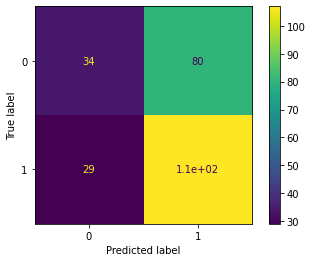

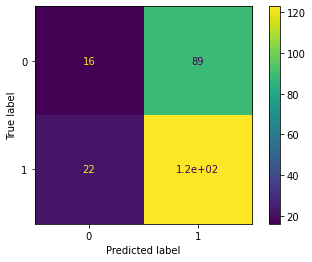

In [359]:
svm_classifier()

Applying PCA to select features 

Split the data into training/testing sets 

Feature Scaling 

Applying SVM classifier 

Accuracy score of Valence SVM-PCA
59.599999999999994
Applying PCA to select features 

Split the data into training/testing sets 

Feature Scaling 

Applying SVM classifier 

56.00000000000001


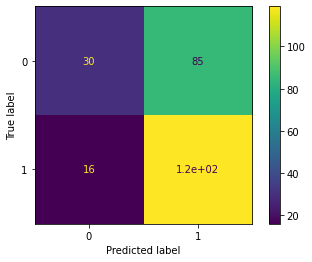

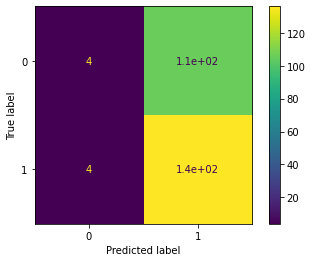

In [360]:
def svm_classifier_pca():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
   
    print("Split the data into training/testing sets \n")

    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=4)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test_0) 
    print("Accuracy score of Valence SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #######################################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
   
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=4)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0,y_predict_0)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test_0) 
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
svm_classifier_pca()

Accuracy score of Valence 
54.400000000000006
Accuracy score of Arousal 
51.6


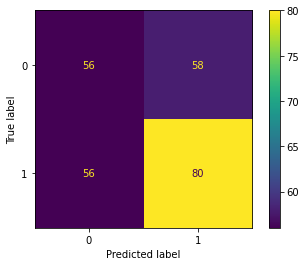

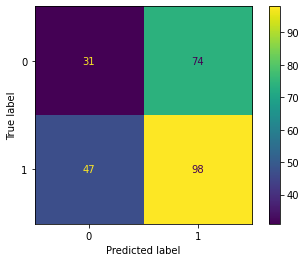

In [361]:
def adaBoost_classifier(): 
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    # PCA to select features
    # pca = PCA(n_components=10, svd_solver='full')
    # pca.fit(X)
    # X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    
    clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)

adaBoost_classifier()

In [362]:
from xgboost import XGBClassifier
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [363]:
X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y1=data['Arousal'].values
y2=data['Valence'].values
#PCA to select features
# pca = PCA(n_components=10, svd_solver='full')
# pca.fit(X)
# X = pca.transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)


In [364]:
xgb1 = XGBClassifier(n_estimators=50, max_depth=5)
# training_start = time.perf_counter()
xgb1.fit(X_train, y_train)
# training_end = time.perf_counter()
#prediction_start = time.perf_counter()
preds = xgb1.predict(X_test)
#prediction_end = time.perf_counter()
#acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
#xgb_train_time = training_end-training_start
#xgb_prediction_time = prediction_end-prediction_start
print(accuracy_score(y_test, preds)*100)
#print("Time consumed for training: %4.3f" % (xgb_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

62.0


In [365]:
y=data['Valence'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [366]:
xgb2 = XGBClassifier(n_estimators=50, max_depth=5)
# training_start = time.perf_counter()
xgb2.fit(X_train, y_train)
# training_end = time.perf_counter()
#prediction_start = time.perf_counter()
preds = xgb2.predict(X_test)
#prediction_end = time.perf_counter()
#acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
#xgb_train_time = training_end-training_start
#xgb_prediction_time = prediction_end-prediction_start
print(accuracy_score(y_test, preds)*100)
# print("Time consumed for training: %4.3f" % (xgb_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

60.0


In [367]:
test = data.sample(1)
copy = test
predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

predict_y_arousal = test['Arousal'].values
predict_y_valence = test['Valence'].values
print(test)
# print(copy)
print(predict_x)
print(predict_y_arousal)
print(predict_y_valence)
Arousalpredict = xgb1.predict(predict_x)
Valencepredict = xgb2.predict(predict_x)
print(Arousalpredict)
print(Valencepredict)

            0          1         2  ...  Arousal  Dominance  Likings
32  54.464144  114.87336  0.474123  ...        0          0        1

[1 rows x 71 columns]
[[ 5.44641443e+01  1.14873360e+02  4.74123369e-01  1.96553092e+04
   2.10915569e+00  5.00044999e+00  9.69143198e+02  6.37931034e-01
   6.48148148e-01  9.14285714e-01  2.66666667e-01  5.44554455e+01
   5.48025851e+01  5.41418749e+01  4.25925926e+01  5.70435419e-01
   4.29564581e-01  4.12210523e+01  3.57709163e+01  5.78884501e-01
   4.21115499e-01  8.74007750e+01  7.45452431e+01  5.77328510e-01
   4.22671490e-01  6.83303396e+01  5.84660232e+01  4.12282715e-01
   1.33500107e+00  2.35000000e+02  1.19000000e+02  0.00000000e+00
   1.55892262e+02  3.50000000e+00  3.50000000e+01 -8.40000000e+00
   1.38607478e+02  6.93037391e+01  3.50000000e+01  0.00000000e+00
   1.19000000e+01  1.87670278e+04  2.60000000e+01  4.04400000e+03
   4.02000000e+02  1.18354776e+08  1.10744064e+02  9.21454239e+01
   6.68085208e+01  6.45125154e-01  3.50354423e+

In [368]:
from sklearn.preprocessing import MaxAbsScaler
X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y=data['Arousal'].values
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(X)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size=0.2, random_state=123)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
#acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print(accuracy_score(y_test, preds)*100)
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

56.00000000000001
Time consumed for training: 0.004 seconds
Time consumed for prediction: 0.00095 seconds


In [369]:
test = data.sample(1)
copy = test
predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

predict_y_arousal = test['Arousal'].values
predict_y_valence = test['Valence'].values

In [370]:
print(test)
# print(copy)
print(predict_x)
print(predict_y_arousal)
print(predict_y_valence)

             0          1         2  ...  Arousal  Dominance  Likings
832  16.965397  50.814942  0.333866  ...        1          1        1

[1 rows x 71 columns]
[[1.69653974e+01 5.08149416e+01 3.33866317e-01 2.70835345e+03
  2.99521081e+00 4.13967545e+00 6.08805850e+02 5.05882353e-01
  4.73684211e-01 6.94444444e-01 7.40740740e-02 4.75961539e+01
  4.74004625e+01 4.77789192e+01 4.34210526e+01 3.91581633e-01
  6.08418367e-01 1.06244186e+01 1.32432682e+01 5.49942623e-01
  4.50057377e-01 3.76834036e+01 3.40898722e+01 5.34039197e-01
  4.65960803e-01 2.76849885e+01 2.58602353e+01 1.99713892e-01
  1.43508452e+00 2.20000000e+01 1.80000000e+01 1.50000000e+01
  3.94738040e+01 4.00000000e-01 1.50000000e+01 1.00000000e-01
  2.85936972e+01 1.42968486e+01 1.90000000e+01 1.50000000e+00
  3.00000000e-01 1.52093469e+04 8.10000000e+01 4.06100000e+03
  1.52000000e+02 1.22952434e+08 1.00578281e+02 7.19094242e+01
  2.31734140e+01 1.49119179e-01 8.20375764e+00 4.00135578e+00
  1.23479058e+02 8.11063260e+05

In [371]:
Arousalpredict = xgb1.predict(predict_x)
Valencepredict = xgb2.predict(predict_x)

In [372]:
Arousalpredict

array([1])

In [373]:
Valencepredict

array([1])

In [374]:
X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y1=data['Arousal'].values
y2=data['Valence'].values

In [375]:
import xgboost as xgb
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 0)


In [376]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.6080


In [377]:
data_dmatrix = xgb.DMatrix(data=X,label=y1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2, random_state = 0)

In [378]:
# instantiate the classifier 
xgb_clf2 = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf2.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.5520


In [379]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.660662,0.033691,0.562131,0.023417
1,0.690681,0.035352,0.557121,0.024659
2,0.723735,0.042097,0.578160,0.031441
3,0.755644,0.025839,0.589579,0.016594
4,0.771367,0.018368,0.587608,0.008426


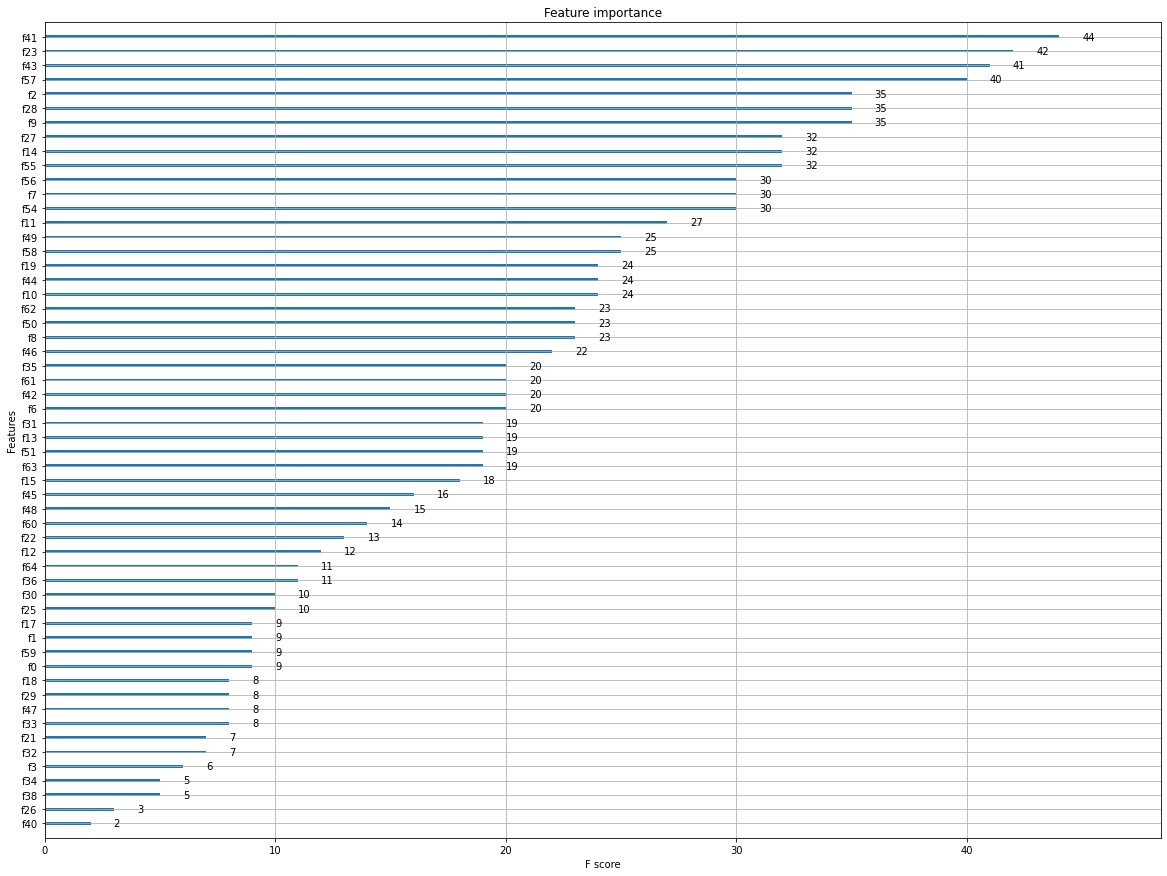

<Figure size 1440x1080 with 0 Axes>

In [385]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (20, 15))
plt.show()

In [384]:
test = data.sample(1)
copy = test
predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

predict_y_arousal = test['Arousal'].values
predict_y_valence = test['Valence'].values
#print(test)
# print(copy)
#print(predict_x)
print(predict_y_arousal)
print(predict_y_valence)
Arousalpredict = xgb_clf.predict(predict_x)
Valencepredict = xgb_clf2.predict(predict_x)
print(Arousalpredict)
print(Valencepredict)

[0]
[1]
[0]
[1]
